In [90]:
import os
import sys
sys.path.append(os.getcwd()+"/../..")
from src import paths

import pandas as pd

from datasets import load_dataset

from sklearn.metrics import f1_score, recall_score, precision_score, ConfusionMatrixDisplay

In [91]:
job_id = 3592235
results = pd.read_csv(paths.RESULTS_PATH/'ms_diag-llama2-chat_zero-shot_{}.csv'.format(job_id))
results.drop(columns=['Unnamed: 0'], inplace=True)
results.rename(columns={'0': 'output'}, inplace=True)

In [92]:
# Load data
data_files = {"train": "ms-diag_clean_train.csv", "validation": "ms-diag_clean_val.csv", "test": "ms-diag_clean_test.csv"}
df = load_dataset(os.path.join(paths.DATA_PATH_PREPROCESSED,'ms-diag'), data_files = data_files)

# Label to id
label2id = {label: i for i, label in enumerate(set(df['train']['labels']))}
id2label = {i: label for i, label in enumerate(set(df['train']['labels']))}

results["labels"] = df['train']['labels']

In [104]:
bla = "False"
DO_SAMPLE = True if bla == "True" else False
DO_SAMPLE

False

In [93]:
pd.set_option('display.max_colwidth', None)
results['output']

0           \n\n* "Sekundär progrediente Multiple Sklerose (SPMS)"
1       \n\n"primäre progrediente Multiple Sklerose (PPMS)"\n\nThe
2           \n\n"schubförmig remittierende Multiple Sklerose (RRMS
3           \n\n"schubförmig remittierende Multiple Sklerose (RRMS
4           \n\n"schubförmig remittierende Multiple Sklerose (RRMS
                                  ...                             
118         \n\n* "Sekundär progrediente Multiple Sklerose (SPMS)"
119         \n\n"schubförmig remittierende Multiple Sklerose (RRMS
120    \n\n"primäre progrediente Multiple Sklerose (PPMS)"\n\nHere
121         \n\n"schubförmig remittierende Multiple Sklerose (RRMS
122         \n\n2. Schubförmig remittierende Multiple Sklerose (RR
Name: output, Length: 123, dtype: object

In [94]:
# Map from output to label
# Dictionary to map keywords to labels
keyword_label_mapping = {
    "rrms": 'relapsing_remitting_multiple_sclerosis',
    "spms": 'secondary_progressive_multiple_sclerosis',
    "ppms": 'primary_progressive_multiple_sclerosis',
    "remittierende multiple sklerose": 'relapsing_remitting_multiple_sclerosis',
    "sekundär progrediente multiple sklerose": 'secondary_progressive_multiple_sclerosis',
    "primär progrediente multiple sklerose": 'primary_progressive_multiple_sclerosis',
}

# Function to assign labels based on text content
def assign_label(text):
    for keyword, label in keyword_label_mapping.items():
        if keyword in text.lower():
            return label
    return "unknown"  # Default label if no keyword is found

# Assign labels to each text in the list
results["predicted_labels"] = [assign_label(text) for text in results['output']]

In [95]:
# How many unknown labels?
results[results['predicted_labels'] == 'unknown'].shape[0]

2

/home/ubuntu/anaconda3/envs/inf-extr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.4205017992802879
Recall: 0.5823863636363636
Precision: 0.42018645357686457


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (2).

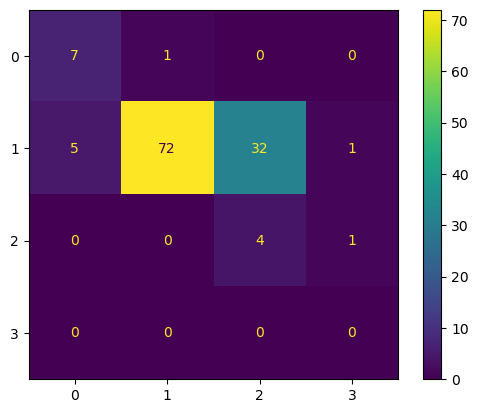

In [96]:
# Get f1 score, recall and precision
f1 = f1_score(results['labels'], results['predicted_labels'], average='macro')
recall = recall_score(results['labels'], results['predicted_labels'], average='macro')
precision = precision_score(results['labels'], results['predicted_labels'], average='macro')

print("F1 score: {}".format(f1))
print("Recall: {}".format(recall))
print("Precision: {}".format(precision))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(results['labels'], results['predicted_labels'], display_labels=[set(results['labels']), "unknown"])

F1 score: 0.6022089626811177
Recall: 0.8329510703363914
Precision: 0.6546296296296296


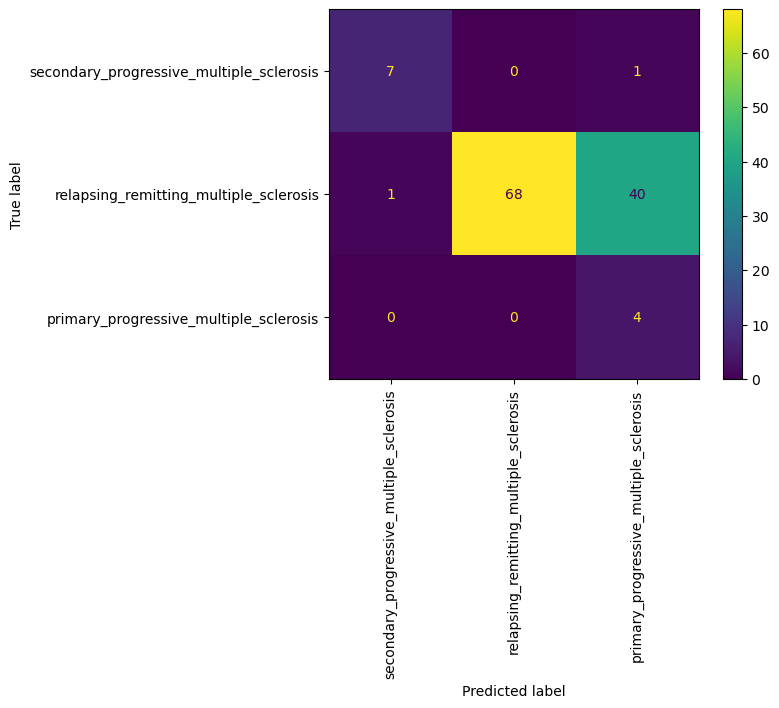

In [ ]:
# Withouth unknown labels
results_no_unknown = results[results['predicted_labels'] != 'unknown']

# Get f1 score, recall and precision
f1 = f1_score(results_no_unknown['labels'], results_no_unknown['predicted_labels'], average='macro')
recall = recall_score(results_no_unknown['labels'], results_no_unknown['predicted_labels'], average='macro')
precision = precision_score(results_no_unknown['labels'], results_no_unknown['predicted_labels'], average='macro')

print("F1 score: {}".format(f1))
print("Recall: {}".format(recall))
print("Precision: {}".format(precision))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(results_no_unknown['labels'], results_no_unknown['predicted_labels'], display_labels=list(set(results_no_unknown['labels'])), xticks_rotation='vertical')